<h1 align='center'>Computer Vision Project(Single Image Super Resolution With Convolution Neural Network)</center>

# Md. Kamrul Hasan 
Yujie

# Load library 

In [1]:
from keras.datasets import mnist
from keras.layers import Reshape,Dense
import numpy as np
from keras.layers import UpSampling2D,MaxPool2D,Conv2D,Activation,Dropout,BatchNormalization,Conv2DTranspose
from keras.models import Sequential,load_model
import matplotlib.pyplot as plt
from scipy.misc import imresize
from scipy import ndimage as nd
import myplot
from skimage.measure import compare_psnr,compare_ssim
from tqdm import tqdm_notebook as tqdm
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import ycbcr2rgb,rgb2ycbcr
from skimage.measure import compare_psnr,compare_ssim
from scipy.misc import imread
from os import listdir
# from skimage.color import rgb2 
import os

Using TensorFlow backend.


# Load data 

In [2]:
#down=np.load('./BSD100-SRF_4.npz')
HR_images = np.load('./Train/HR1.npy')
#LR_images = down['LR']
LR_images = np.load('./Train/LR1.npy')
LR_images=LR_images.astype('uint8')
HR_images=HR_images.astype('uint8')
print("High Resoltuion image shape: ",HR_images.shape)
print("Low Resoltuion image shape:  ",LR_images.shape)

#h_r_folder_name = 'image-dataset/h_r'
#l_r_folder_name = 'image-dataset/l_r'
#h_r_files_list = os.listdir(h_r_folder_name)
#l_r_files_list = os.listdir(l_r_folder_name)
#h_r_files_list = [h_r_folder_name+'/'+ x for x in h_r_files_list]
#l_r_files_list = [l_r_folder_name+'/'+ x for x in l_r_files_list]

High Resoltuion image shape:  (100, 320, 480, 3)
Low Resoltuion image shape:   (100, 80, 120, 3)


# Visualise HR and LR in RBG

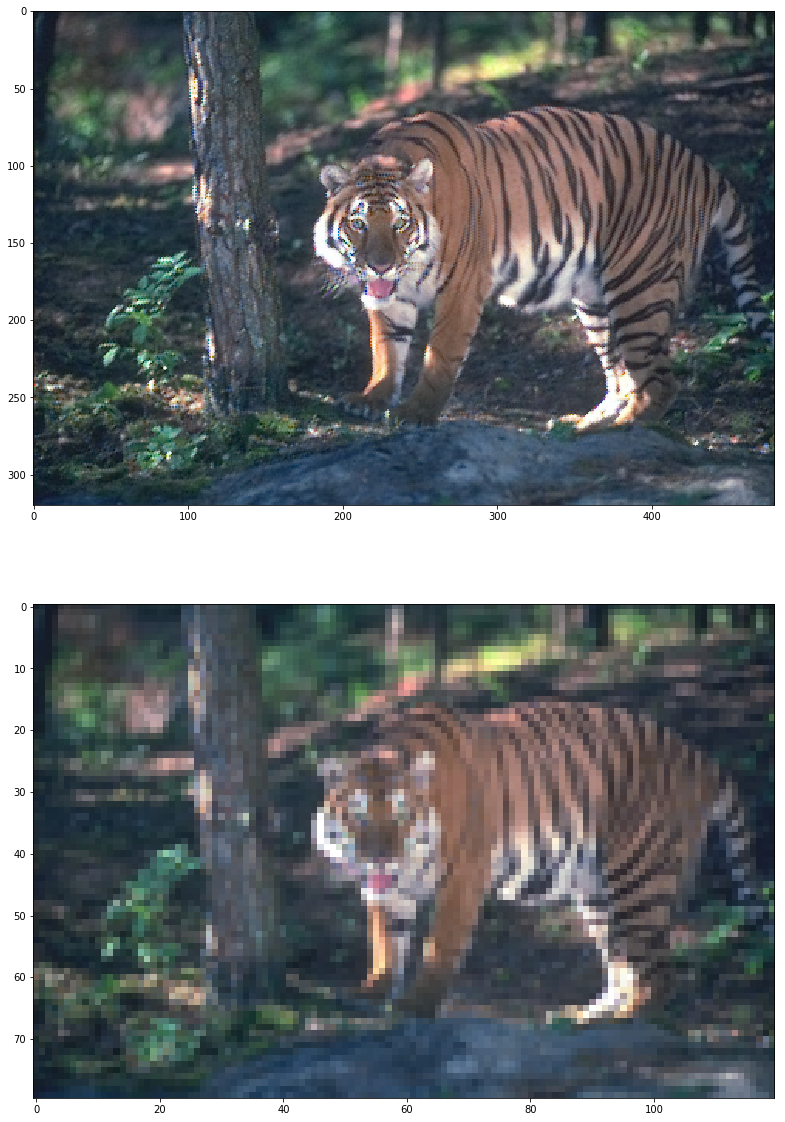

In [3]:
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.imshow((HR_images[6]))
plt.subplot(212)
plt.imshow((LR_images[6]))
plt.show()

In [4]:
#Original_image = np.reshape(LR_images,(LR_images.shape[0],LR_images.shape[1],LR_images.shape[2],1))
print ('shape of original image is %d x %d  x%d  x%d ' %HR_images.shape)
#LR_mnist = np.reshape(LR_mnist,(LR_mnist.shape[0],LR_mnist.shape[1],LR_mnist.shape[2],1))
print ('shape of downsample image is  %d x %d  x%d  x%d  ' %LR_images.shape )

shape of original image is 100 x 320  x480  x3 
shape of downsample image is  100 x 80  x120  x3  


# Bicubic interplation 

In [5]:
from skimage.transform import  resize
temp_bicubic= []
for index in tqdm(range(len(LR_images))):
    temp_bicubic.append(imresize(LR_images[index],size=4.0,interp='bicubic'))
bicubic_LR =np.array(temp_bicubic)
# bicubic_mnist = np.reshape(bicubic_mnist,(bicubic_mnist.shape[0],bicubic_mnist.shape[1],bicubic_mnist.shape[2],1))
bicubic_LR.shape

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


(100, 320, 480, 3)

# Traditional method of recover image from low resolution 

imresize support a lot of image Interpolation methods there I examed 5 of them. 
They are:  
- nearest 
- lanczors
- bilinear 
- cubic 
- bicubic 

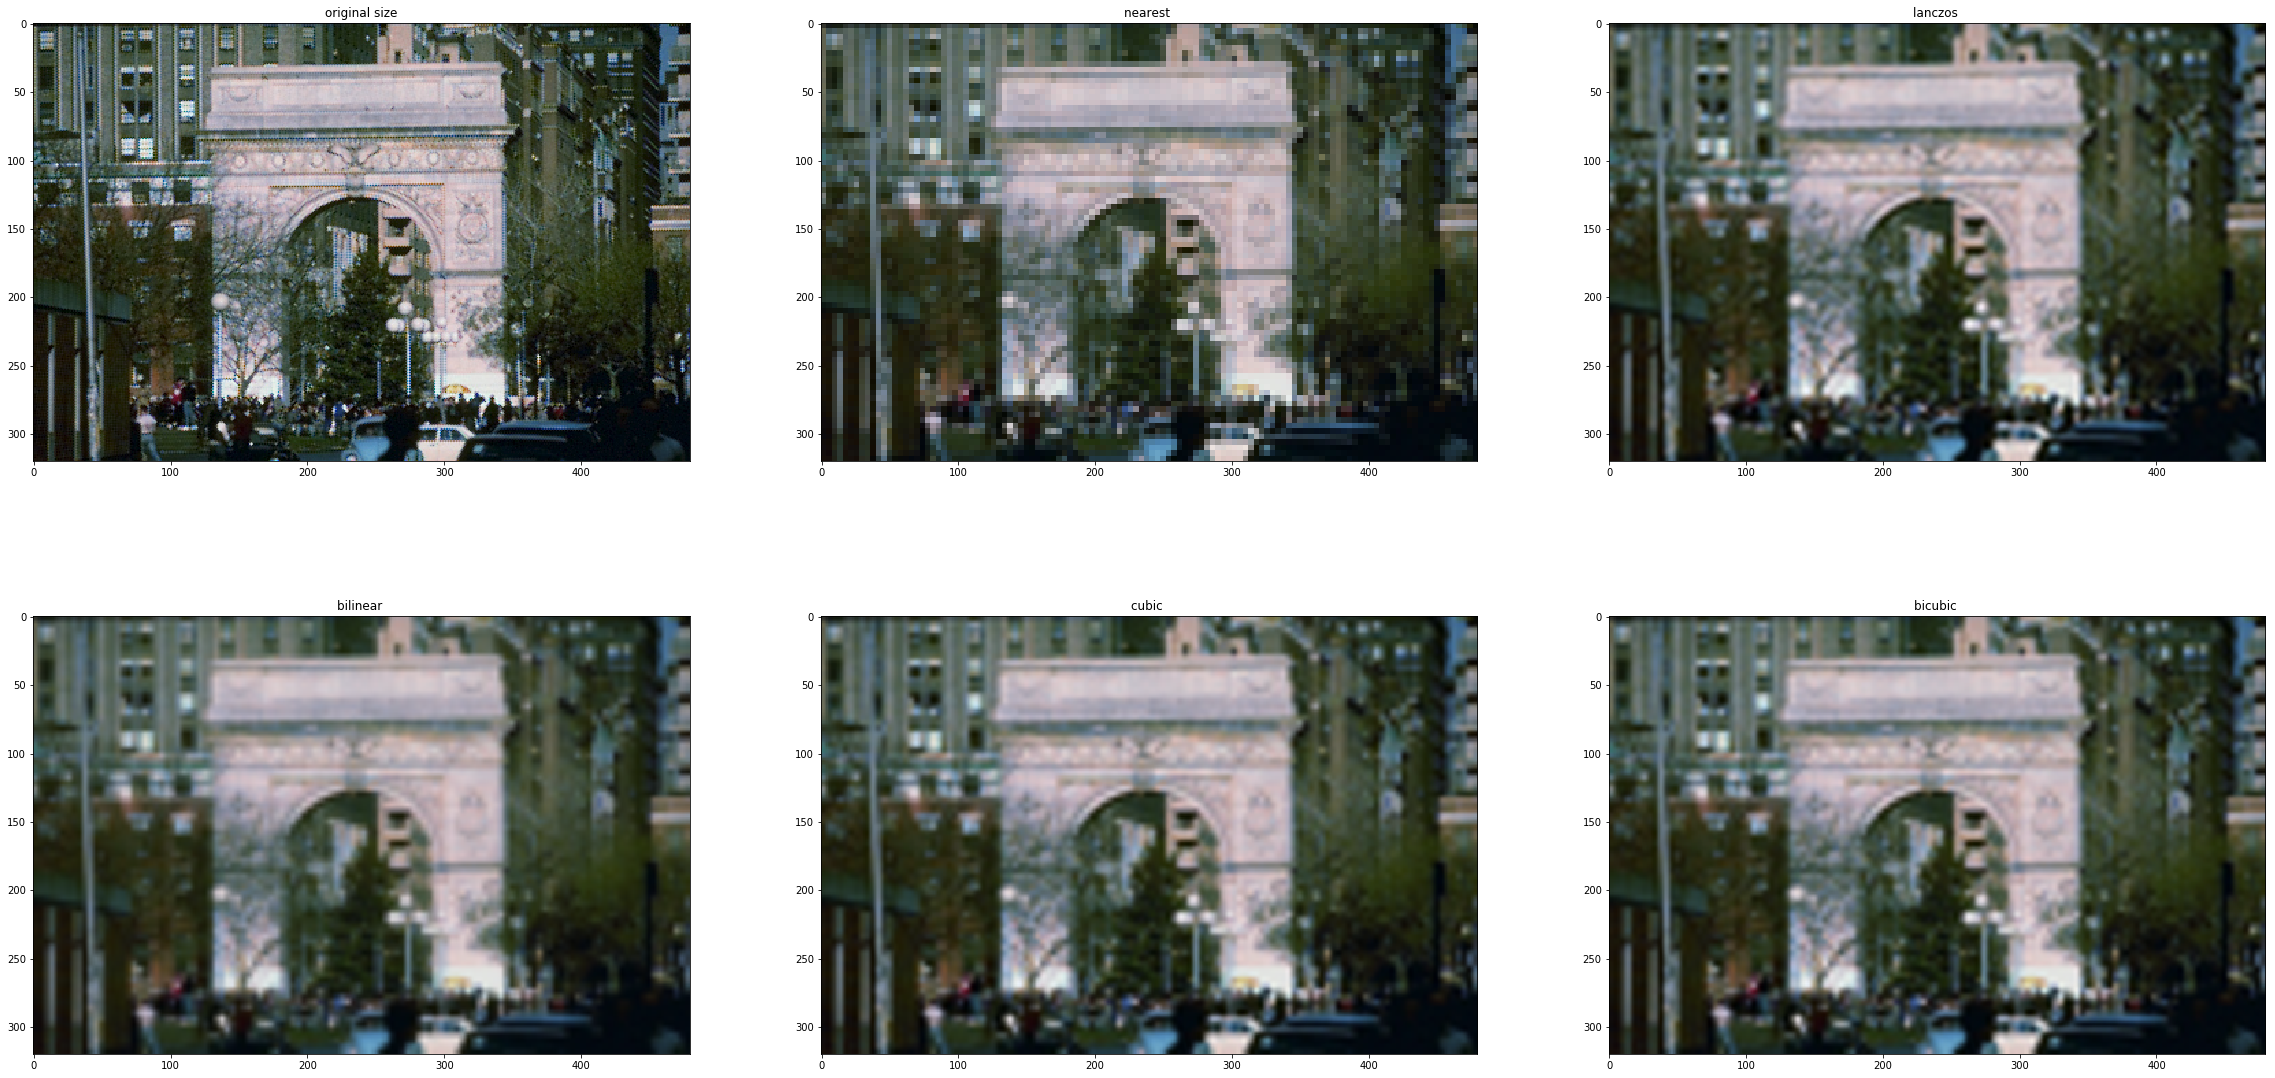

In [6]:
#bicubic_mnist = np.reshape(LR_images,(LR_mnist.shape[0],LR_mnist.shape[1],LR_mnist.shape[2]))
image_index=21
#Img_HR = ycbcr2rgb(HR_images[image_index])
#Img_LR = ycbcr2rgb(HR_images[image_index])
plt.figure(figsize=(40,20))
myplot.plot_comparison(O_image=(HR_images[image_index]),down_image=LR_images[image_index])

# The input is the bicubic-low-resolution image , the output is the original image

Before generate the model. It is very important to normalise the image . 
The SRCNN is only operated in Y channel. Only Y channel is normalised and the CNN is take 1 color channel is input.
The original value of image is between 0 and 255, I will make it between -1 and 1. 


In [7]:
#bicubic_LR_norm = (bicubic_LR-127.5)/128
#HR_images_norm=(HR_images-127.5)/128
#LR_images_norm = (LR_images-127.5)/128
#bicubic_LR=(bicubic_LR-127.5)/128
#LR_Y_channel = np.reshape(LR_images,(LR_images.shape[0],LR_images.shape[1],LR_images.shape[2],1))

#HR_Y_channel = np.reshape(HR_Y_channel,(HR_Y_channel.shape[0],HR_Y_channel.shape[1],HR_Y_channel.shape[2],1))
print ('Max of LR_mnist is %f, Min of LR_mnist is %f' %(bicubic_LR_norm.max() ,bicubic_LR_norm.min() ))
print ('Max of Original_image is %f, Min of Original_image is %f' %(HR_images_norm.max() ,HR_images_norm.min() ))


NameError: name 'bicubic_LR_norm' is not defined

In [8]:
LR_images_norm.shape

NameError: name 'LR_images_norm' is not defined

In [9]:
R=Sequential()
#G.add(Conv2DTranspose(64,(8,8),input_shape = (None,None,3),strides=(4,4),padding='same'))

R.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
#G.add(Conv2D(16,(5,5),padding='same'))
#G.add(Dropout(0.9))
R.add(Activation('relu')) 
R.add(Conv2D(32,(1,1),padding='same'))
R.add(Activation('relu'))
# G.add(BatchNormalization())
#G.add(Conv2D(16,(1,1),padding='same'))
#G.add(Activation('relu'))
#G.add(Conv2D(16,(3,3),padding='same'))
#G.add(Activation('relu'))
R.add(Conv2D(1,(5,5),padding='same'))
#G.add(Activation('sigmoid'))
#R.summary()
R.compile(loss='mse',optimizer='adam')
his_R = R.fit(x=bicubic_LR[:,:,:,0:1],y=HR_images[:,:,:,0:1],batch_size=4,epochs=50,verbose=1)

Epoch 1/50
100/100 [==============================] - ETA: 1:25 - loss: 12968.247 - ETA: 1:19 - loss: 10435.186 - ETA: 1:15 - loss: 8285.875 - ETA: 1:12 - loss: 6401.74 - ETA: 1:07 - loss: 5310.03 - ETA: 1:04 - loss: 4797.75 - ETA: 1:00 - loss: 4518.92 - ETA: 56s - loss: 4166.3413 - ETA: 53s - loss: 3783.807 - ETA: 50s - loss: 3443.239 - ETA: 47s - loss: 3214.949 - ETA: 43s - loss: 3038.547 - ETA: 40s - loss: 2871.739 - ETA: 37s - loss: 2755.442 - ETA: 33s - loss: 2614.536 - ETA: 30s - loss: 2478.427 - ETA: 27s - loss: 2351.467 - ETA: 23s - loss: 2253.027 - ETA: 20s - loss: 2158.206 - ETA: 16s - loss: 2103.919 - ETA: 13s - loss: 2023.439 - ETA: 10s - loss: 1945.866 - ETA: 6s - loss: 1883.524 - ETA: 3s - loss: 1822.28 - 84s 839ms/step - loss: 1771.7578
Epoch 2/50
100/100 [==============================] - ETA: 1:22 - loss: 670.531 - ETA: 1:16 - loss: 569.412 - ETA: 1:12 - loss: 558.500 - ETA: 1:10 - loss: 486.008 - ETA: 1:06 - loss: 426.367 - ETA: 1:03 - loss: 436.307 - ETA: 1:00 - loss

100/100 [==============================] - ETA: 1:18 - loss: 239.110 - ETA: 1:14 - loss: 198.239 - ETA: 1:11 - loss: 190.704 - ETA: 1:08 - loss: 190.799 - ETA: 1:04 - loss: 191.981 - ETA: 1:01 - loss: 189.804 - ETA: 58s - loss: 187.692 - ETA: 54s - loss: 192.78 - ETA: 51s - loss: 197.57 - ETA: 48s - loss: 203.80 - ETA: 45s - loss: 203.17 - ETA: 42s - loss: 196.89 - ETA: 39s - loss: 193.34 - ETA: 35s - loss: 187.04 - ETA: 32s - loss: 184.76 - ETA: 29s - loss: 178.37 - ETA: 26s - loss: 187.49 - ETA: 22s - loss: 190.44 - ETA: 19s - loss: 187.32 - ETA: 16s - loss: 187.04 - ETA: 13s - loss: 185.84 - ETA: 9s - loss: 189.0331 - ETA: 6s - loss: 194.588 - ETA: 3s - loss: 197.324 - 83s 833ms/step - loss: 207.6493
Epoch 24/50
100/100 [==============================] - ETA: 1:31 - loss: 93.17 - ETA: 1:25 - loss: 137.552 - ETA: 1:18 - loss: 160.274 - ETA: 1:13 - loss: 167.973 - ETA: 1:09 - loss: 161.486 - ETA: 1:06 - loss: 178.003 - ETA: 1:03 - loss: 203.416 - ETA: 59s - loss: 201.405 - ETA: 56s - 

100/100 [==============================] - ETA: 1:17 - loss: 161.692 - ETA: 1:15 - loss: 120.527 - ETA: 1:12 - loss: 136.287 - ETA: 1:09 - loss: 177.412 - ETA: 1:06 - loss: 177.397 - ETA: 1:03 - loss: 166.897 - ETA: 59s - loss: 163.042 - ETA: 56s - loss: 152.22 - ETA: 52s - loss: 153.37 - ETA: 49s - loss: 157.40 - ETA: 46s - loss: 160.89 - ETA: 43s - loss: 161.45 - ETA: 39s - loss: 170.54 - ETA: 36s - loss: 176.85 - ETA: 33s - loss: 185.58 - ETA: 29s - loss: 191.55 - ETA: 26s - loss: 191.74 - ETA: 23s - loss: 189.41 - ETA: 19s - loss: 197.98 - ETA: 16s - loss: 195.96 - ETA: 13s - loss: 197.39 - ETA: 9s - loss: 196.3143 - ETA: 6s - loss: 193.551 - ETA: 3s - loss: 195.867 - 83s 831ms/step - loss: 197.5186
Epoch 46/50
100/100 [==============================] - ETA: 1:18 - loss: 110.472 - ETA: 1:15 - loss: 117.644 - ETA: 1:12 - loss: 150.593 - ETA: 1:09 - loss: 148.637 - ETA: 1:06 - loss: 168.374 - ETA: 1:03 - loss: 154.950 - ETA: 1:00 - loss: 159.770 - ETA: 56s - loss: 155.459 - ETA: 53s 

In [11]:
G=Sequential()
#G.add(Conv2DTranspose(64,(8,8),input_shape = (None,None,3),strides=(4,4),padding='same'))

G.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
#G.add(Conv2D(16,(5,5),padding='same'))
#G.add(Dropout(0.9))
G.add(Activation('relu')) 
G.add(Conv2D(32,(1,1),padding='same'))
G.add(Activation('relu'))
# G.add(BatchNormalization())
#G.add(Conv2D(16,(1,1),padding='same'))
#G.add(Activation('relu'))
#G.add(Conv2D(16,(3,3),padding='same'))
#G.add(Activation('relu'))
G.add(Conv2D(1,(5,5),padding='same'))
#G.add(Activation('sigmoid'))
#G.summary()
G.compile(loss='mse',optimizer='adam')
his_G = G.fit(x=bicubic_LR[:,:,:,1:2],y=HR_images[:,:,:,1:2],batch_size=4,epochs=50,verbose=1)

Epoch 1/50
100/100 [==============================] - ETA: 1:26 - loss: 10021.357 - ETA: 1:19 - loss: 9677.105 - ETA: 1:14 - loss: 7165.42 - ETA: 1:10 - loss: 5549.21 - ETA: 1:07 - loss: 5045.49 - ETA: 1:03 - loss: 4671.56 - ETA: 59s - loss: 4343.1223 - ETA: 56s - loss: 3854.823 - ETA: 53s - loss: 3489.093 - ETA: 50s - loss: 3202.840 - ETA: 46s - loss: 2983.374 - ETA: 43s - loss: 2845.452 - ETA: 39s - loss: 2792.347 - ETA: 36s - loss: 2665.284 - ETA: 33s - loss: 2526.028 - ETA: 29s - loss: 2402.562 - ETA: 26s - loss: 2302.102 - ETA: 23s - loss: 2209.800 - ETA: 19s - loss: 2156.955 - ETA: 16s - loss: 2090.517 - ETA: 13s - loss: 2025.156 - ETA: 9s - loss: 1946.448 - ETA: 6s - loss: 1878.34 - ETA: 3s - loss: 1818.33 - 83s 827ms/step - loss: 1772.3186
Epoch 2/50
100/100 [==============================] - ETA: 1:18 - loss: 367.790 - ETA: 1:15 - loss: 496.196 - ETA: 1:12 - loss: 503.743 - ETA: 1:09 - loss: 493.634 - ETA: 1:06 - loss: 465.053 - ETA: 1:03 - loss: 476.295 - ETA: 59s - loss: 489

100/100 [==============================] - ETA: 1:18 - loss: 246.927 - ETA: 1:15 - loss: 220.600 - ETA: 1:12 - loss: 256.815 - ETA: 1:09 - loss: 255.303 - ETA: 1:05 - loss: 234.438 - ETA: 1:02 - loss: 222.845 - ETA: 59s - loss: 212.483 - ETA: 55s - loss: 207.79 - ETA: 52s - loss: 204.96 - ETA: 49s - loss: 207.73 - ETA: 45s - loss: 216.72 - ETA: 42s - loss: 209.36 - ETA: 39s - loss: 208.12 - ETA: 36s - loss: 207.64 - ETA: 32s - loss: 205.95 - ETA: 29s - loss: 204.72 - ETA: 26s - loss: 203.48 - ETA: 22s - loss: 198.87 - ETA: 19s - loss: 205.20 - ETA: 16s - loss: 202.35 - ETA: 13s - loss: 199.08 - ETA: 9s - loss: 200.1210 - ETA: 6s - loss: 198.533 - ETA: 3s - loss: 201.645 - 82s 816ms/step - loss: 198.5432
Epoch 24/50
100/100 [==============================] - ETA: 1:19 - loss: 103.145 - ETA: 1:15 - loss: 136.288 - ETA: 1:12 - loss: 119.825 - ETA: 1:09 - loss: 135.822 - ETA: 1:05 - loss: 146.636 - ETA: 1:02 - loss: 164.357 - ETA: 58s - loss: 169.059 - ETA: 55s - loss: 172.44 - ETA: 52s - 

100/100 [==============================] - ETA: 1:15 - loss: 160.249 - ETA: 1:13 - loss: 181.034 - ETA: 1:10 - loss: 180.987 - ETA: 1:07 - loss: 207.530 - ETA: 1:05 - loss: 207.230 - ETA: 1:01 - loss: 211.599 - ETA: 58s - loss: 223.897 - ETA: 55s - loss: 212.86 - ETA: 52s - loss: 213.35 - ETA: 48s - loss: 219.35 - ETA: 45s - loss: 230.48 - ETA: 42s - loss: 222.58 - ETA: 39s - loss: 222.99 - ETA: 35s - loss: 219.37 - ETA: 32s - loss: 210.71 - ETA: 29s - loss: 205.65 - ETA: 26s - loss: 200.73 - ETA: 22s - loss: 194.88 - ETA: 19s - loss: 195.42 - ETA: 16s - loss: 189.67 - ETA: 13s - loss: 186.23 - ETA: 9s - loss: 187.4161 - ETA: 6s - loss: 196.141 - ETA: 3s - loss: 196.412 - 81s 815ms/step - loss: 193.5867
Epoch 46/50
100/100 [==============================] - ETA: 1:17 - loss: 186.960 - ETA: 1:13 - loss: 202.406 - ETA: 1:10 - loss: 184.301 - ETA: 1:07 - loss: 219.046 - ETA: 1:04 - loss: 200.193 - ETA: 1:01 - loss: 194.275 - ETA: 57s - loss: 188.667 - ETA: 54s - loss: 201.29 - ETA: 51s - 

In [12]:
B=Sequential()
#G.add(Conv2DTranspose(64,(8,8),input_shape = (None,None,3),strides=(4,4),padding='same'))

B.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
#G.add(Conv2D(16,(5,5),padding='same'))
#G.add(Dropout(0.9))
B.add(Activation('relu')) 
B.add(Conv2D(32,(1,1),padding='same'))
B.add(Activation('relu'))
# G.add(BatchNormalization())
#G.add(Conv2D(16,(1,1),padding='same'))
#G.add(Activation('relu'))
#G.add(Conv2D(16,(3,3),padding='same'))
#G.add(Activation('relu'))
B.add(Conv2D(1,(5,5),padding='same'))
#G.add(Activation('sigmoid'))
#B.summary()
B.compile(loss='mse',optimizer='adam')
his_B = B.fit(x=bicubic_LR[:,:,:,2:3],y=HR_images[:,:,:,2:3],batch_size=4,epochs=50,verbose=1)

Epoch 1/50
100/100 [==============================] - ETA: 1:32 - loss: 30448.613 - ETA: 1:21 - loss: 20334.522 - ETA: 1:16 - loss: 14084.064 - ETA: 1:11 - loss: 10703.562 - ETA: 1:07 - loss: 8938.532 - ETA: 1:03 - loss: 8104.26 - ETA: 1:00 - loss: 7207.48 - ETA: 56s - loss: 6385.6883 - ETA: 52s - loss: 5772.551 - ETA: 49s - loss: 5249.768 - ETA: 46s - loss: 4836.644 - ETA: 42s - loss: 4498.556 - ETA: 39s - loss: 4229.440 - ETA: 36s - loss: 3991.177 - ETA: 32s - loss: 3775.817 - ETA: 29s - loss: 3596.117 - ETA: 26s - loss: 3408.015 - ETA: 22s - loss: 3240.552 - ETA: 19s - loss: 3083.291 - ETA: 16s - loss: 2954.286 - ETA: 13s - loss: 2849.501 - ETA: 9s - loss: 2752.747 - ETA: 6s - loss: 2659.92 - ETA: 3s - loss: 2573.82 - 82s 817ms/step - loss: 2496.9455
Epoch 2/50
100/100 [==============================] - ETA: 1:15 - loss: 599.803 - ETA: 1:12 - loss: 505.232 - ETA: 1:10 - loss: 449.719 - ETA: 1:07 - loss: 461.162 - ETA: 1:04 - loss: 481.293 - ETA: 1:01 - loss: 480.804 - ETA: 57s - los

100/100 [==============================] - ETA: 1:24 - loss: 217.385 - ETA: 1:20 - loss: 236.481 - ETA: 1:20 - loss: 219.853 - ETA: 1:17 - loss: 280.195 - ETA: 1:14 - loss: 250.981 - ETA: 1:11 - loss: 242.789 - ETA: 1:08 - loss: 234.282 - ETA: 1:04 - loss: 234.677 - ETA: 1:00 - loss: 248.061 - ETA: 56s - loss: 245.919 - ETA: 53s - loss: 244.90 - ETA: 48s - loss: 238.08 - ETA: 44s - loss: 244.77 - ETA: 40s - loss: 245.73 - ETA: 36s - loss: 246.34 - ETA: 33s - loss: 247.92 - ETA: 29s - loss: 245.89 - ETA: 25s - loss: 239.98 - ETA: 21s - loss: 240.03 - ETA: 17s - loss: 235.30 - ETA: 14s - loss: 231.37 - ETA: 10s - loss: 225.04 - ETA: 7s - loss: 220.5813 - ETA: 3s - loss: 230.317 - 89s 887ms/step - loss: 231.2111
Epoch 24/50
100/100 [==============================] - ETA: 1:25 - loss: 132.684 - ETA: 1:18 - loss: 187.905 - ETA: 1:14 - loss: 195.232 - ETA: 1:10 - loss: 209.327 - ETA: 1:07 - loss: 203.221 - ETA: 1:03 - loss: 205.512 - ETA: 1:00 - loss: 200.511 - ETA: 56s - loss: 202.499 - ETA

100/100 [==============================] - ETA: 1:17 - loss: 122.300 - ETA: 1:17 - loss: 157.134 - ETA: 1:13 - loss: 145.939 - ETA: 1:10 - loss: 170.586 - ETA: 1:06 - loss: 174.222 - ETA: 1:03 - loss: 171.254 - ETA: 59s - loss: 197.451 - ETA: 56s - loss: 196.54 - ETA: 52s - loss: 182.03 - ETA: 49s - loss: 185.48 - ETA: 45s - loss: 188.44 - ETA: 42s - loss: 188.71 - ETA: 39s - loss: 182.51 - ETA: 36s - loss: 188.11 - ETA: 32s - loss: 188.08 - ETA: 29s - loss: 197.07 - ETA: 26s - loss: 202.89 - ETA: 22s - loss: 207.72 - ETA: 19s - loss: 204.15 - ETA: 16s - loss: 213.14 - ETA: 13s - loss: 213.75 - ETA: 9s - loss: 213.0372 - ETA: 6s - loss: 212.265 - ETA: 3s - loss: 216.723 - 82s 820ms/step - loss: 219.2896
Epoch 46/50
100/100 [==============================] - ETA: 1:18 - loss: 248.744 - ETA: 1:14 - loss: 193.403 - ETA: 1:11 - loss: 230.608 - ETA: 1:08 - loss: 254.608 - ETA: 1:05 - loss: 249.810 - ETA: 1:01 - loss: 242.718 - ETA: 58s - loss: 223.935 - ETA: 55s - loss: 226.49 - ETA: 52s - 

In [16]:
R.save('SISRIA_HR_CE.R.h5')
G.save('SISRIA_HR_CE.G.h5')
B.save('SISRIA_HR_CE.B.h5')

# Predict 

In [55]:
R=load_model('SISRIA_HR_CE.R.h5')
G=load_model('SISRIA_HR_CE.G.h5')
B=load_model('SISRIA_HR_CE.B.h5')

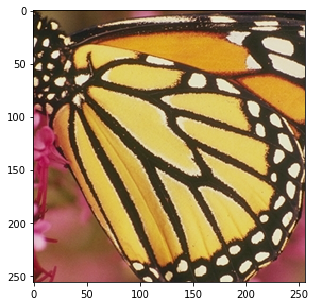

In [35]:
import imageio
mypath = './Test/Set5/image_SRF_4/img_003_SRF_4_HR.png'
value_truth= imageio.imread(mypath)
plt.figure(figsize=(10,5))
plt.imshow(value_truth)

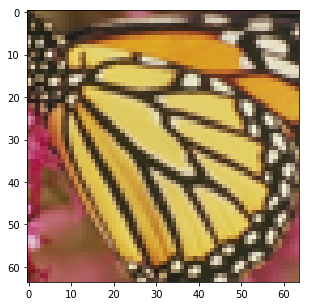

In [36]:
mypath = './Test/Set5/image_SRF_4/img_003_SRF_4_LR.png'
value_pred=imageio.imread(mypath)
plt.figure(figsize=(10,5))
plt.imshow(value_pred)

In [37]:
value_pred_bi=imresize(arr=value_pred,size=4.0,interp='bicubic')
#value_pred=(value_pred-127.5)/128
value_pred=np.reshape(value_pred,(1,value_pred.shape[0],value_pred.shape[1],value_pred.shape[2]))
value_pred_bi = np.reshape(value_pred_bi,(1,value_pred_bi.shape[0],value_pred_bi.shape[1],value_pred_bi.shape[2]))


C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [38]:
value_pred_bi.shape
value_pred.shape


(1, 64, 64, 3)

In [39]:
predict_SR=value_pred_bi.copy()
Rc= R.predict(value_pred_bi[:,:,:,0:1])
Gc= G.predict(value_pred_bi[:,:,:,1:2])
Bc = B.predict(value_pred_bi[:,:,:,2:3])


In [40]:
#predict_SR= G.predict(x=value_pred)

In [41]:
predict_SR=np.zeros((288,288,3))
predict_SR[:,:,0:1] = Rc
predict_SR[:,:,1:2] = Gc
predict_SR[:,:,2:3] = Bc

plt.figure(figsize=(10,5))
plt.imshow(predict_SR)

ValueError: could not broadcast input array from shape (256,256,1) into shape (288,288,1)

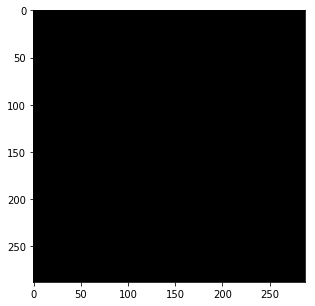

In [42]:
#predict_SR=predict_SR*128+127.5
predict_SR[predict_SR>255]=255
predict_SR[predict_SR<0]=0
predict_SR=predict_SR.astype('uint8')
predict_SR.shape
plt.figure(figsize=(10,5))
plt.imshow(predict_SR)

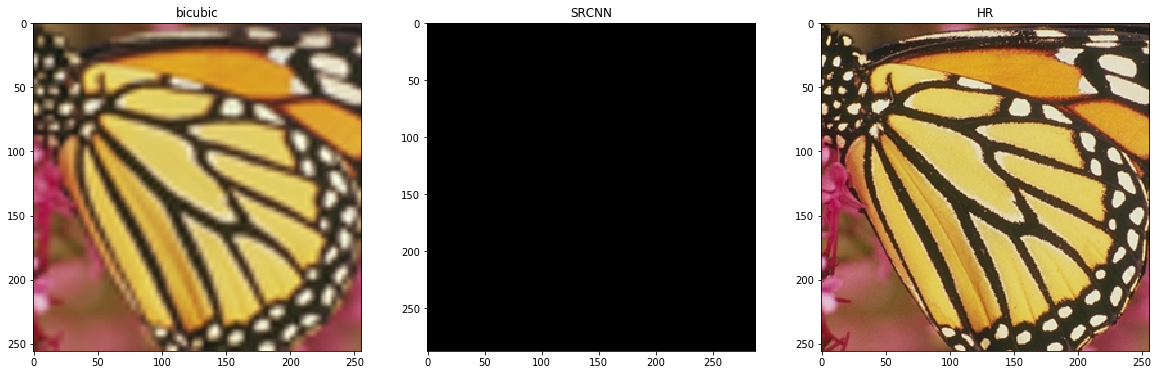

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('bicubic')
plt.imshow(value_pred_bi[0].astype('uint8'))
plt.subplot(132)

plt.title('SRCNN')

plt.imshow(predict_SR.astype('uint8'))
plt.subplot(133)

plt.title('HR')

plt.imshow(value_truth.astype('uint8'))

#plt.savefig('SET5_SRF4_02')
plt.show()

<h1 align = 'center' =>Measure PSNR </center>

In [44]:
compare_psnr(im_true=value_truth,im_test=predict_SR)

ValueError: Input images must have the same dimensions.

In [45]:
compare_psnr(im_true=value_truth,im_test=value_pred_bi[0])

20.906052137086277

# Stand alone func

In [46]:
def super_resolution(img): 
    img=imresize(arr=img,size=4.0,interp='bicubic')
    predict_SR=np.zeros(img.shape)
    img =np.reshape(img,(1,img.shape[0],img.shape[1],3))
    predict_SR[:,:,0:1] = R.predict(img[:,:,:,0:1])
    predict_SR[:,:,1:2] = G.predict(img[:,:,:,1:2])
    predict_SR[:,:,2:3] = B.predict(img[:,:,:,2:3])
    predict_SR[predict_SR>255]=255
    predict_SR[predict_SR<0]=0
    predict_SR=predict_SR.astype('uint8')
    return predict_SR,img[0]

In [47]:
img.shape

NameError: name 'img' is not defined

In [52]:
def funcplot(value_pred_bi,predict_SR,value_truth,name):
    plt.figure(figsize=(16,8))
    plt.subplot(131)
    plt.xticks([])
    plt.yticks([])
    plt.title('bicubic')
    plt.imshow(value_pred_bi.astype('uint8'))
    plt.subplot(132)

    plt.xticks([])
    plt.yticks([])
    plt.title('SRCNN')

    plt.imshow(predict_SR.astype('uint8'))
    plt.subplot(133)

    plt.xticks([])
    plt.yticks([])
    plt.title('HR')

    plt.imshow(value_truth.astype('uint8'))

    plt.savefig('./'+name)
    plt.show()

In [53]:
value_truth.shape

(512, 512, 3)

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


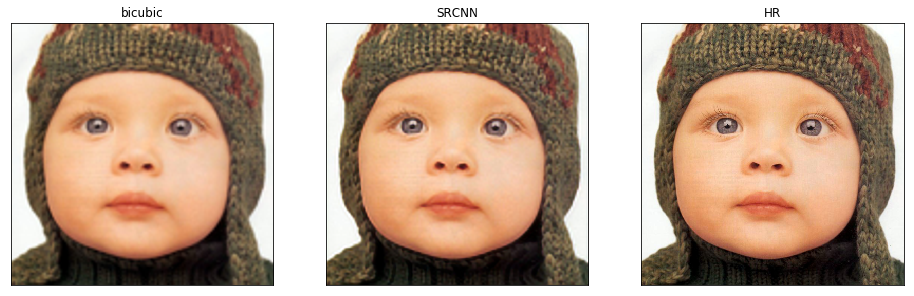

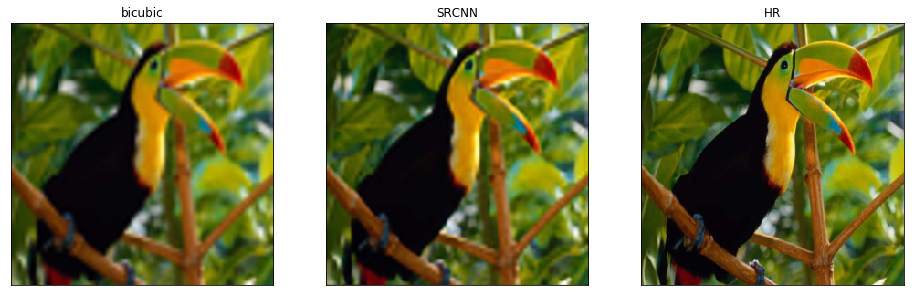

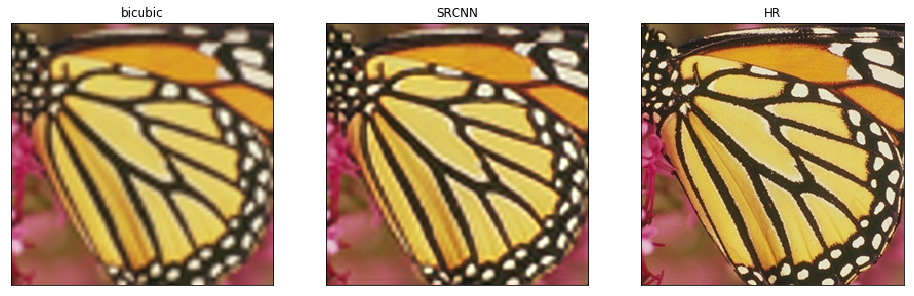

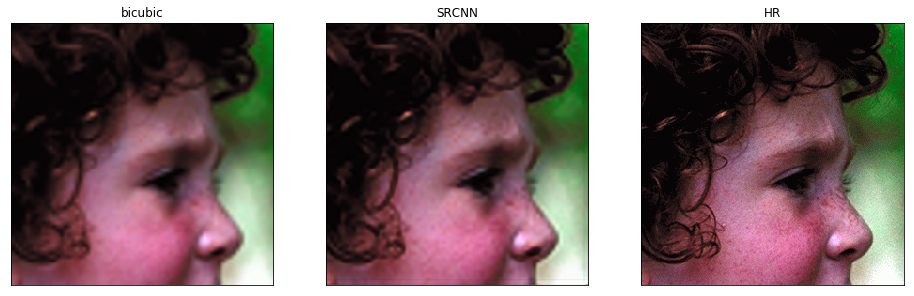

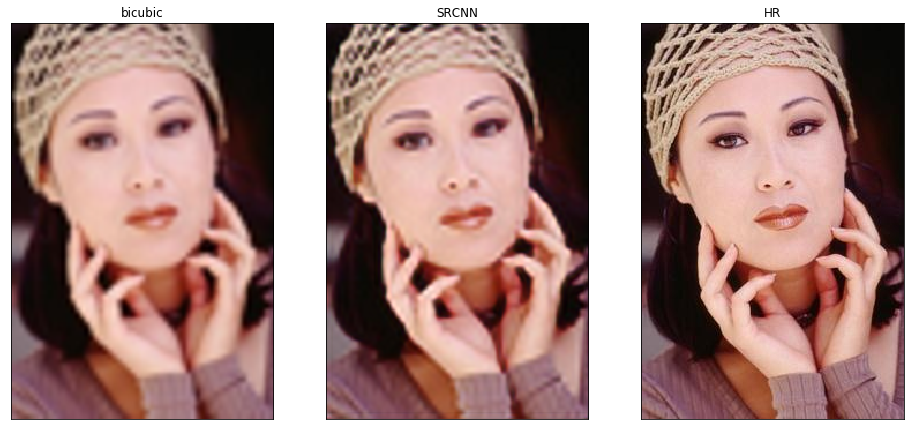

[31.00743236 28.95314067 21.97257954 29.1694208  25.83166294]
[30.42055422 28.08149603 20.90605214 28.96556363 25.11345838]


In [54]:
path = './Test/Set5/image_SRF_4/'
psrn_o =[]
psrn_n =[]
for files in listdir(path):
    if 'LR' in files:
        img = imread(path+files)
        SR ,value_pred_bi= super_resolution(img)
        files= files.replace('L','H')
        value_truth= imread(path+files)
        psrn_o.append(compare_psnr(im_true=value_truth,im_test=SR))
        psrn_n.append(compare_psnr(im_true=value_truth,im_test=value_pred_bi))
        funcplot(value_pred_bi,SR,value_truth,files)
psrn_o = np.array(psrn_o)
psrn_n = np.array(psrn_n)
print (str(psrn_o) +'\n' + str(psrn_n) )

In [ ]:
from keras.callbacks import Callback

callback = Callback()
his_R = R.fit(x=bicubic_LR[:,:,:,0:1],y=HR_images[:,:,:,0:1],batch_size=4,epochs=5,verbose=1,callbacks=[callback])

In [ ]:
his_R

In [ ]:
import keras 
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))